In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from ML_basic_function import *
from sklearn.metrics import mean_squared_error as mse

In [2]:
np.random.seed(24)
x = np.linspace(0, 4, 20).reshape(-1, 1)
x = np.concatenate((x, np.ones_like(x)), axis=1)
x

array([[0.        , 1.        ],
       [0.21052632, 1.        ],
       [0.42105263, 1.        ],
       [0.63157895, 1.        ],
       [0.84210526, 1.        ],
       [1.05263158, 1.        ],
       [1.26315789, 1.        ],
       [1.47368421, 1.        ],
       [1.68421053, 1.        ],
       [1.89473684, 1.        ],
       [2.10526316, 1.        ],
       [2.31578947, 1.        ],
       [2.52631579, 1.        ],
       [2.73684211, 1.        ],
       [2.94736842, 1.        ],
       [3.15789474, 1.        ],
       [3.36842105, 1.        ],
       [3.57894737, 1.        ],
       [3.78947368, 1.        ],
       [4.        , 1.        ]])

In [3]:
y = np.exp(x[:, 0] + 1).reshape(-1, 1)
y

array([[  2.71828183],
       [  3.35525011],
       [  4.1414776 ],
       [  5.11193983],
       [  6.30980809],
       [  7.78836987],
       [  9.61339939],
       [ 11.86608357],
       [ 14.64663368],
       [ 18.07874325],
       [ 22.31509059],
       [ 27.54413077],
       [ 33.99847904],
       [ 41.96525883],
       [ 51.79887449],
       [ 63.93677707],
       [ 78.91892444],
       [ 97.41180148],
       [120.23806881],
       [148.4131591 ]])

$$y=e^{(x+1)}$$

In [5]:
np.linalg.lstsq(x, y, rcond=-1)[0]

array([[ 30.44214742],
       [-22.37576724]])

The predicted model by least square method is $$y=30.44x-22.38$$

In [6]:
y_hat = x[:, 0] * 30.44 - 22.38

In [11]:
mse(y, y_hat, squared=False)

18.85530128362398

In [12]:
ylog = np.log(y)

In [13]:
np.linalg.lstsq(x, ylog, rcond=-1)[0]

array([[1.],
       [1.]])

In [17]:
y_hat = np.exp(x[:, 0]+1)

In [18]:
mse(y, y_hat, squared=False)

0.0

$$\begin{aligned}
Sigmoid'(x) &= (\frac{1}{1+e^{-x}})' \\
&=((1+e^{-x})^{-1})'  \\
&=(-1)(1+e^{-x})^{-2} \cdot (e^{-x})' \\
&=(1+e^{-x})^{-2}(e^{-x}) \\
&=\frac{e^{-x}}{(1+e^{-x})^{2}} \\
&=\frac{e^{-x}+1-1}{(1+e^{-x})^{2}} \\
&=\frac{1}{1+e^{-x}} - \frac{1}{(1+e^{-x})^2} \\
&=\frac{1}{1+e^{-x}}(1-\frac{1}{1+e^{-x}}) \\
&=Sigmoid(x)(1-Sigmoid(x))
\end{aligned}$$

Logistic regression basic function: $$y = \frac{1}{1+e^{-(\hat w^T \cdot \hat x)}}$$
when $$\hat w^T \cdot \hat x = 0$$ 
get the boundary function

In [2]:
np.random.seed(123)

n_dots = 20
x = np.linspace(0, 1 ,n_dots)
y = np.sqrt(x) + 0.2*np.random.rand(n_dots) - 0.1

In [3]:
def plot_polynomial_fit(x, y, deg):
    p = np.poly1d(np.polyfit(x,y,deg))
    t = np.linspace(0,1,200)
    plt.plot(x, y, 'ro', t, p(t), '-', t, np.sqrt(t), 'r--')

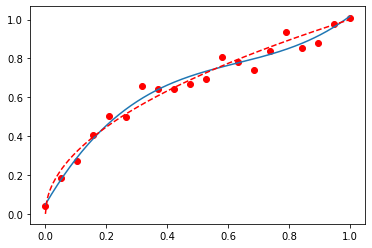

In [4]:
plot_polynomial_fit(x, y, 3)

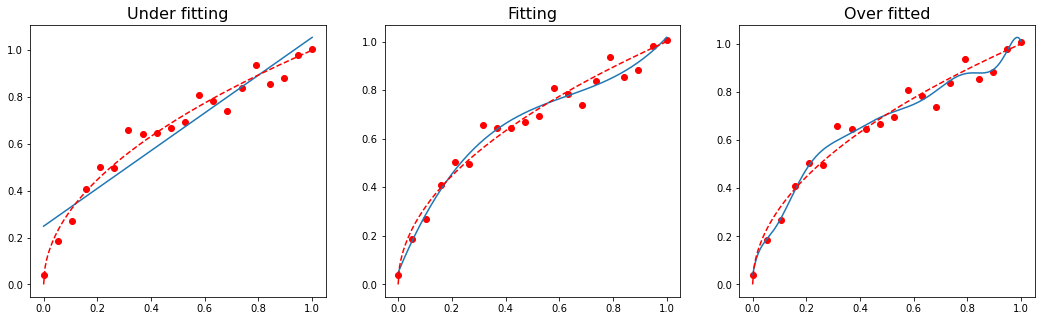

In [8]:
plt.figure(figsize=(18,5))
titles = ['Under fitting','Fitting', 'Over fitted']
for index, deg in enumerate([1,3,10]):
    plt.subplot(1,3, index + 1)
    plot_polynomial_fit(x, y, deg)
    plt.title(titles[index], fontsize=16)

In [78]:
x_l = []

In [79]:
for i in range(10):
    x_temp = np.power(x, i+1).reshape(-1,1)
    x_l.append(x_temp)

In [86]:
X = np.concatenate(x_l,axis=1)

In [87]:
X[:2]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [5.26315789e-02, 2.77008310e-03, 1.45793847e-04, 7.67336039e-06,
        4.03861073e-07, 2.12558460e-08, 1.11872874e-09, 5.88804597e-11,
        3.09897157e-12, 1.63103767e-13]])

In [88]:
y

array([0.03929384, 0.1866436 , 0.26981313, 0.40762266, 0.50272526,
       0.49761047, 0.65810433, 0.64394293, 0.64507206, 0.66667071,
       0.69411185, 0.80669585, 0.78243386, 0.73910577, 0.83800393,
       0.9361224 , 0.85416128, 0.88099565, 0.9796388 , 1.00636552])

In [122]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression

In [120]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [92]:
lr.coef_

array([ 6.26103457e+00, -1.19764265e+02,  1.42603456e+03, -8.87839988e+03,
        3.20918671e+04, -7.14049022e+04,  9.93100740e+04, -8.41213555e+04,
        3.96752034e+04, -7.98404881e+03])

In [93]:
mse(lr.predict(X),y)

0.0011726682228720832

Text(0.5, 1.0, '10_degree')

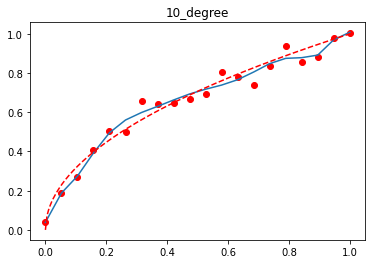

In [95]:
t = np.linspace(0, 1, 200)
plt.plot(x,y,'ro',x, lr.predict(X),'-',t, np.sqrt(t),'r--')
plt.title('10_degree')

In [97]:
reg_rid = Ridge(alpha=0.005)

In [98]:
reg_rid.fit(X,y)

Ridge(alpha=0.005)

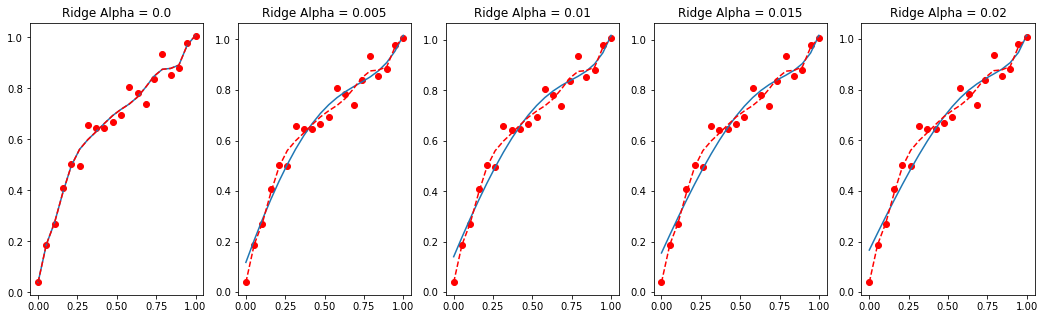

In [116]:
# Add penalty with Ridge (l2 norm)
plt.figure(figsize=(18,5))
for index, alpha in enumerate(np.linspace(0,0.02,5)):
    reg_rid = Ridge(alpha=alpha)
    reg_rid.fit(X,y)
    plt.subplot(1,5,index+1)
    plt.plot(x,y,'ro',x,reg_rid.predict(X),'-',x, lr.predict(X),'r--')
    plt.title(f'Ridge Alpha = {alpha}')

C:\Users\Liu\AppData\Local\Temp\ipykernel_11532\4110238220.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg_rid.fit(X,y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.461e-02, tolerance: 1.336e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


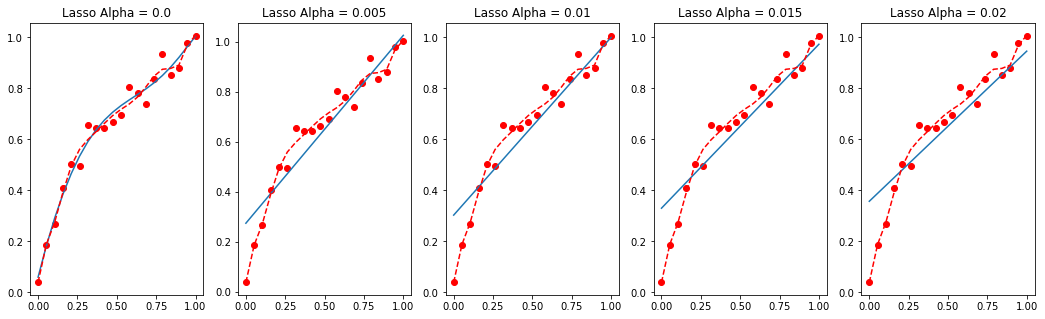

In [117]:
# Add penalty with Lasso (l1 norm)
plt.figure(figsize=(18,5))
for index, alpha in enumerate(np.linspace(0,0.02,5)):
    reg_rid = Lasso(alpha=alpha)
    reg_rid.fit(X,y)
    plt.subplot(1,5,index+1)
    plt.plot(x,y,'ro',x,reg_rid.predict(X),'-',x, lr.predict(X),'r--')
    plt.title(f'Lasso Alpha = {alpha}')

Stronger penalty of Lasso than Ridge can be observed

In sklearn, linearRegression has no penalty itself. Add l1 penalty to linearRegression is Lasso, add l2 is Ridge. while LogisticRegression has penalty and other parameters. It can be seen as the combination of the three.

In [124]:
LogisticRegression?